In [11]:
import os
import numpy as np
import scipy.io as sio

def extract_and_combine_data(data_dir):
    mat_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.mat')])
    
    sizes = []
    data_list = []

    # 첫 번째 파일 로드 및 키 확인
    first_file_path = os.path.join(data_dir, mat_files[0])
    first_file = sio.loadmat(first_file_path)
    
    print(f"Keys in the first file ({first_file_path}): {list(first_file.keys())}")
    
    keys = [key for key in first_file.keys() if key.startswith('de_LDS')]
    
    if not keys:
        raise ValueError(f"No keys starting with 'de_LDS' found in {first_file_path}")

    for key in keys:
        s = first_file[key].shape
        sizes.append(s[1])

    max_vals = max(sizes)
    data = np.zeros((675, 62, max_vals, 5))

    # 각 파일에서 데이터 로드 및 결합
    def load_data(file_path, start_idx, end_idx):
        mat_data = sio.loadmat(file_path)
        keys = [key for key in mat_data.keys() if key.startswith('de_LDS')]
        
        for j in range(start_idx, end_idx + 1):
            key_idx = (j - 1) % 15
            key = keys[key_idx]
            eeg_data = mat_data[key]
            data[j-1, :, :eeg_data.shape[1], :] = eeg_data

    load_data(os.path.join(data_dir, '1_20131027.mat'), 1, 15)
    load_data(os.path.join(data_dir, '1_20131030.mat'), 16, 30)
    load_data(os.path.join(data_dir, '1_20131107.mat'), 31, 45)
    load_data(os.path.join(data_dir, '2_20140404.mat'), 46, 60)
    load_data(os.path.join(data_dir, '2_20140413.mat'), 61, 75)
    load_data(os.path.join(data_dir, '2_20140419.mat'), 76, 90)
    load_data(os.path.join(data_dir, '3_20140603.mat'), 91, 105)
    load_data(os.path.join(data_dir, '3_20140611.mat'), 106, 120)
    load_data(os.path.join(data_dir, '3_20140629.mat'), 121, 135)
    load_data(os.path.join(data_dir, '4_20140621.mat'), 136, 150)
    load_data(os.path.join(data_dir, '4_20140702.mat'), 151, 165)
    load_data(os.path.join(data_dir, '4_20140705.mat'), 166, 180)
    load_data(os.path.join(data_dir, '5_20140411.mat'), 181, 195)
    load_data(os.path.join(data_dir, '5_20140418.mat'), 196, 210)
    load_data(os.path.join(data_dir, '5_20140506.mat'), 211, 225)
    load_data(os.path.join(data_dir, '6_20130712.mat'), 226, 240)
    load_data(os.path.join(data_dir, '6_20131016.mat'), 241, 255)
    load_data(os.path.join(data_dir, '6_20131113.mat'), 256, 270)
    load_data(os.path.join(data_dir, '7_20131027.mat'), 271, 285)
    load_data(os.path.join(data_dir, '7_20131030.mat'), 286, 300)
    load_data(os.path.join(data_dir, '7_20131106.mat'), 301, 315)
    load_data(os.path.join(data_dir, '8_20140511.mat'), 316, 330)
    load_data(os.path.join(data_dir, '8_20140514.mat'), 331, 345)
    load_data(os.path.join(data_dir, '8_20140521.mat'), 346, 360)
    load_data(os.path.join(data_dir, '9_20140620.mat'), 361, 375)
    load_data(os.path.join(data_dir, '9_20140627.mat'), 376, 390)
    load_data(os.path.join(data_dir, '9_20140704.mat'), 391, 405)
    load_data(os.path.join(data_dir, '10_20131130.mat'), 406, 420)
    load_data(os.path.join(data_dir, '10_20131204.mat'), 421, 435)
    load_data(os.path.join(data_dir, '10_20131211.mat'), 436, 450)
    load_data(os.path.join(data_dir, '11_20140618.mat'), 451, 465)
    load_data(os.path.join(data_dir, '11_20140625.mat'), 466, 480)
    load_data(os.path.join(data_dir, '11_20140630.mat'), 481, 495)
    load_data(os.path.join(data_dir, '12_20131127.mat'), 496, 510)
    load_data(os.path.join(data_dir, '12_20131201.mat'), 511, 525)
    load_data(os.path.join(data_dir, '12_20131207.mat'), 526, 540)
    load_data(os.path.join(data_dir, '13_20140527.mat'), 541, 555)
    load_data(os.path.join(data_dir, '13_20140603.mat'), 556, 570)
    load_data(os.path.join(data_dir, '13_20140610.mat'), 571, 585)
    load_data(os.path.join(data_dir, '14_20140601.mat'), 586, 600)
    load_data(os.path.join(data_dir, '14_20140615.mat'), 601, 615)
    load_data(os.path.join(data_dir, '14_20140627.mat'), 616, 630)
    load_data(os.path.join(data_dir, '15_20130709.mat'), 631, 645)
    load_data(os.path.join(data_dir, '15_20131016.mat'), 646, 660)
    load_data(os.path.join(data_dir, '15_20131105.mat'), 661, 675)

    return data

data_dir = '/home/work/HCOH/Preprocessed_EEG'

# 데이터 추출 및 결합
data = extract_and_combine_data(data_dir)

# 결합된 데이터 .mat 파일로 저장
sio.savemat('DE_data_all_corrected.mat', {'data': data})

Keys in the first file (/home/work/HCOH/Preprocessed_EEG/10_20131130.mat): ['__header__', '__version__', '__globals__', 'ww_eeg1', 'ww_eeg2', 'ww_eeg3', 'ww_eeg4', 'ww_eeg5', 'ww_eeg6', 'ww_eeg7', 'ww_eeg8', 'ww_eeg9', 'ww_eeg10', 'ww_eeg11', 'ww_eeg12', 'ww_eeg13', 'ww_eeg14', 'ww_eeg15']


ValueError: No keys starting with 'de_LDS' found in /home/work/HCOH/Preprocessed_EEG/10_20131130.mat

In [12]:
import os
import scipy.io as sio

def check_keys_in_files(data_dir):
    mat_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.mat')])
    
    for mat_file in mat_files:
        file_path = os.path.join(data_dir, mat_file)
        data = sio.loadmat(file_path)
        keys = list(data.keys())
        print(f"Keys in {mat_file}: {keys}")

data_dir = '/home/work/HCOH/Preprocessed_EEG'

# Check keys in each file
check_keys_in_files(data_dir)

Keys in 10_20131130.mat: ['__header__', '__version__', '__globals__', 'ww_eeg1', 'ww_eeg2', 'ww_eeg3', 'ww_eeg4', 'ww_eeg5', 'ww_eeg6', 'ww_eeg7', 'ww_eeg8', 'ww_eeg9', 'ww_eeg10', 'ww_eeg11', 'ww_eeg12', 'ww_eeg13', 'ww_eeg14', 'ww_eeg15']
Keys in 10_20131204.mat: ['__header__', '__version__', '__globals__', 'ww_eeg1', 'ww_eeg2', 'ww_eeg3', 'ww_eeg4', 'ww_eeg5', 'ww_eeg6', 'ww_eeg7', 'ww_eeg8', 'ww_eeg9', 'ww_eeg10', 'ww_eeg11', 'ww_eeg12', 'ww_eeg13', 'ww_eeg14', 'ww_eeg15']
Keys in 10_20131211.mat: ['__header__', '__version__', '__globals__', 'ww_eeg1', 'ww_eeg2', 'ww_eeg3', 'ww_eeg4', 'ww_eeg5', 'ww_eeg6', 'ww_eeg7', 'ww_eeg8', 'ww_eeg9', 'ww_eeg10', 'ww_eeg11', 'ww_eeg12', 'ww_eeg13', 'ww_eeg14', 'ww_eeg15']
Keys in 11_20140618.mat: ['__header__', '__version__', '__globals__', 'wsf_eeg1', 'wsf_eeg2', 'wsf_eeg3', 'wsf_eeg4', 'wsf_eeg5', 'wsf_eeg6', 'wsf_eeg7', 'wsf_eeg8', 'wsf_eeg9', 'wsf_eeg10', 'wsf_eeg11', 'wsf_eeg12', 'wsf_eeg13', 'wsf_eeg14', 'wsf_eeg15']
Keys in 11_20140625.m

Keys in 6_20130712.mat: ['__header__', '__version__', '__globals__', 'mhw_eeg1', 'mhw_eeg2', 'mhw_eeg3', 'mhw_eeg4', 'mhw_eeg5', 'mhw_eeg6', 'mhw_eeg7', 'mhw_eeg8', 'mhw_eeg9', 'mhw_eeg10', 'mhw_eeg11', 'mhw_eeg12', 'mhw_eeg13', 'mhw_eeg14', 'mhw_eeg15']
Keys in 6_20131016.mat: ['__header__', '__version__', '__globals__', 'mhw_eeg1', 'mhw_eeg2', 'mhw_eeg3', 'mhw_eeg4', 'mhw_eeg5', 'mhw_eeg6', 'mhw_eeg7', 'mhw_eeg8', 'mhw_eeg9', 'mhw_eeg10', 'mhw_eeg11', 'mhw_eeg12', 'mhw_eeg13', 'mhw_eeg14', 'mhw_eeg15']
Keys in 6_20131113.mat: ['__header__', '__version__', '__globals__', 'mhw_eeg1', 'mhw_eeg2', 'mhw_eeg3', 'mhw_eeg4', 'mhw_eeg5', 'mhw_eeg6', 'mhw_eeg7', 'mhw_eeg8', 'mhw_eeg9', 'mhw_eeg10', 'mhw_eeg11', 'mhw_eeg12', 'mhw_eeg13', 'mhw_eeg14', 'mhw_eeg15']
Keys in 7_20131027.mat: ['__header__', '__version__', '__globals__', 'phl_eeg1', 'phl_eeg2', 'phl_eeg3', 'phl_eeg4', 'phl_eeg5', 'phl_eeg6', 'phl_eeg7', 'phl_eeg8', 'phl_eeg9', 'phl_eeg10', 'phl_eeg11', 'phl_eeg12', 'phl_eeg13', 'phl_e

In [15]:
import os
import numpy as np
import pandas as pd
import scipy.io as sio

def extract_and_combine_data(data_dir, label_file):
    mat_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.mat') and f != 'label.mat'])
    
    sizes = []
    count = 0

    # 첫 번째 파일에서 키 패턴 추출
    first_file = sio.loadmat(os.path.join(data_dir, mat_files[0]))
    base_key = [key[:-1] for key in first_file.keys() if key.endswith('1')][0]  # 키 패턴 추출
    
    # 각 파일에서 데이터 로드 및 결합
    for mat_file in mat_files:
        mat_data = sio.loadmat(os.path.join(data_dir, mat_file))
        
        for i in range(1, 16):  # 1부터 15까지의 시퀀스
            key = f"{base_key}{i}"
            if key in mat_data:
                s = mat_data[key].shape
                sizes.append(s[1])
                
    max_vals = max(sizes)
    data = np.zeros((675, 62, max_vals))
    
    def load_and_store_data(file_path, start_idx):
        nonlocal count
        mat_data = sio.loadmat(file_path)
        for j in range(1, 16):
            key = f"{base_key}{j}"
            if key in mat_data:
                data[count, :, :sizes[count % 15]] = mat_data[key]
            count += 1
    
    for mat_file in mat_files:
        load_and_store_data(os.path.join(data_dir, mat_file), count // 15)
    
    return data

# 데이터 디렉토리와 라벨 파일 경로 설정
data_dir = '/home/work/HCOH/Preprocessed_EEG'
label_file = os.path.join(data_dir, 'label.mat')

# 데이터 추출 및 결합
data = extract_and_combine_data(data_dir, label_file)

# 라벨 불러오기
labels = sio.loadmat(label_file)['label'][0]

# 데이터프레임으로 변환
num_samples, num_channels, num_timesteps = data.shape
data_reshaped = data.reshape(num_samples, num_channels * num_timesteps)
df_data = pd.DataFrame(data_reshaped)
df_labels = pd.DataFrame(labels, columns=['label'])

# 데이터와 라벨 결합
df_combined = pd.concat([df_data, df_labels], axis=1)

# 데이터프레임 출력
print(df_combined)


             0          1          2          3          4          5  \
0   -19.282103  -9.298325 -25.779009  -0.685453 -13.232231  -0.119209   
1   -48.607588 -37.759542 -35.315752 -26.673079 -41.127205 -39.488077   
2    18.686056  -6.943941   1.043081   2.741814   7.659197  -0.983477   
3    -7.748604 -28.342009  -9.745359 -14.424324 -17.136335 -28.163195   
4    16.063452  17.762184  35.256147  26.047230  18.239021  21.815300   
..         ...        ...        ...        ...        ...        ...   
670   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
671   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
672   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
673   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
674   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

             6          7          8          9  ...  3286053  3286054  \
0     8.076429  -7.301569 -20.980835 -19.192696  

In [16]:
import os
import numpy as np
import scipy.io as scio
import tensorflow as tf
from sklearn.model_selection import train_test_split

np.random.seed(0)
window_size = 200

def windows(data, size):
    start = 0
    while ((start + size) <= data.shape[0]):
        yield int(start), int(start + size)
        start += size

# 데이터 디렉토리 설정
dataset_dir ='/home/work/HCOH/Preprocessed_EEG' # 수정 필요
record_list = [task for task in os.listdir(dataset_dir) if os.path.isfile(os.path.join(dataset_dir, task))][:-2]
labels_root = os.path.join(dataset_dir, 'label.mat')
labels = scio.loadmat(labels_root)['label'][0] + 1

DATA = []
LABEL = []

# 비디오 이름 가져오기
keys_array = []
for record in record_list:
    print(record)
    file = os.path.join(dataset_dir, record)
    keys = list(scio.loadmat(file).keys())[3:]
    keys_array.append(keys)
keys_array = np.array(keys_array)

# 데이터와 라벨 로드 및 결합
for i in range(len(keys_array[0])):
    time = -1
    video_data = []
    video_label = []
    for j in range(len(record_list)):
        time += 1
        sub = int(time / 3)
        times = time % 3
        file_name = record_list[j]
        sub_video_name = keys_array[j, i]
        label = labels[i]
        print('label:', label, 'sub:', sub, 'times:', times, 'file_name:', file_name, 'sub_video_name:', sub_video_name)
        file_root = os.path.join(dataset_dir, file_name)
        file_data = scio.loadmat(file_root)
        data_tem = file_data[sub_video_name]
        label_tem = label
        video_data.append(data_tem)
        video_label.append(label_tem)
    data_in = np.array(video_data)
    label_in = np.array(video_label)
    for (start, end) in windows(data_in[0, 0], window_size):
        if len(data_in[0, 0, start:end]) == window_size:
            segments = data_in[:, :, start:end]
            segments = tf.keras.utils.normalize(segments, axis=2)
            labels = label_in
            DATA.append(segments)
            LABEL.append(labels)
            print(len(DATA), len(LABEL))

DATA = np.array(DATA)
DATA = np.expand_dims(DATA, -3)
LABEL = np.array(LABEL)

# 학습, 테스트 및 검증 세트로 분할
x_train_SEED, x_test_SEED, y_train_SEED, y_test_SEED = train_test_split(DATA, LABEL, random_state=42, test_size=0.3)
x_test_SEED, x_val_SEED, y_test_SEED, y_val_SEED = train_test_split(x_test_SEED, y_test_SEED, random_state=42, test_size=0.5)

# 데이터 저장
np.save('DATA_SEED.npy', DATA)
np.save('LABEL_SEED.npy', LABEL)
np.save('x_train_SEED.npy', x_train_SEED)
np.save('x_test_SEED.npy', x_test_SEED)
np.save('x_val_SEED.npy', x_val_SEED)
np.save('y_train_SEED.npy', y_train_SEED)
np.save('y_test_SEED.npy', y_test_SEED)
np.save('y_val_SEED.npy', y_val_SEED)

# 데이터 프레임으로 변환
import pandas as pd

# Flatten the data for the DataFrame
flattened_data = DATA.reshape(DATA.shape[0], -1)
flattened_labels = LABEL.flatten()

# 데이터 프레임 생성
df_data = pd.DataFrame(flattened_data)
df_labels = pd.DataFrame(flattened_labels, columns=['Label'])

# 데이터와 라벨을 결합하여 최종 데이터 프레임 생성
df = pd.concat([df_data, df_labels], axis=1)

# 데이터 프레임 출력
print(df.head())

2024-07-16 12:34:33.608609: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 12:34:33.608678: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 12:34:33.608718: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-16 12:34:33.617022: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


13_20140603.mat
2_20140419.mat
11_20140618.mat
11_20140630.mat
15_20131016.mat
12_20131201.mat
11_20140625.mat
4_20140621.mat
5_20140418.mat
6_20131016.mat
8_20140521.mat
14_20140615.mat
14_20140601.mat
12_20131207.mat
label.mat
13_20140610.mat
15_20130709.mat
7_20131106.mat
9_20140627.mat
10_20131130.mat
6_20131113.mat
1_20131107.mat
9_20140620.mat
15_20131105.mat
4_20140702.mat
5_20140506.mat
4_20140705.mat
12_20131127.mat
13_20140527.mat
readme.txt


ValueError: Unknown mat file type, version 112, 111

In [23]:
import scipy.io as sio
import os

# 데이터 디렉토리 설정
data_dir = '/home/work/HCOH/Preprocessed_EEG'

# 라벨 파일 불러오기
label_file = os.path.join(data_dir, 'label.mat')
labels = sio.loadmat(label_file)['label'][0]

# 라벨의 개수 출력
print(f"Total number of labels: {len(labels)}")

# 라벨의 고유 값과 각 값의 개수 출력
unique_labels, counts = np.unique(labels, return_counts=True)
print(f"Unique labels: {unique_labels}")
print(f"Counts of each label: {counts}")

Total number of labels: 15
Unique labels: [-1  0  1]
Counts of each label: [5 5 5]


In [9]:
import scipy.io as sio
import pandas as pd
import numpy as np
import os

# 데이터 디렉토리 경로
data_dir = '/home/work/HCOH/Preprocessed_EEG'

# 라벨 정보
labels = [1, 0, -1, -1, 0, 1, -1, 0, 1, 1, 0, -1, 0, 1, -1]

# 데이터 프레임을 저장할 리스트
all_data = []
all_labels = []

# 모든 파일에 대해 처리
for file_name in os.listdir(data_dir):
    if file_name.endswith('.mat'):
        # .mat 파일 로드
        mat_data = sio.loadmat(os.path.join(data_dir, file_name))
        
        # 각 키에 대해 데이터 추출
        for i in range(1, 16):  # eeg_1 ~ eeg_15
            key = f'ww_eeg{i}'
            if key in mat_data:
                eeg_data = mat_data[key]
                # 데이터 프레임으로 변환
                eeg_df = pd.DataFrame(eeg_data.T)
                # 라벨 추가
                eeg_df['label'] = labels[i-1]
                # 파일 이름 추가
                eeg_df['file'] = file_name
                # 데이터 저장
                all_data.append(eeg_df)

# 모든 데이터를 결합하여 하나의 데이터 프레임으로 만듦
final_df = pd.concat(all_data, ignore_index=True)

# 결과 출력
print(final_df.head())
print(final_df.tail())

# 결과 저장
final_df.to_csv('eeg_data_with_labels.csv', index=False)

           0          1          2          3          4          5  \
0 -19.282103  11.920929   0.566244 -31.620264 -18.179417   3.129244   
1  -9.298325  20.533800  18.805265 -31.411648  -1.043081  14.007092   
2 -25.779009  11.414289 -11.086464 -37.610531  -7.927418   6.139278   
3  -0.685453  13.530254  -4.529953 -30.815601 -16.301870   9.626150   
4 -13.232231  12.338161  -3.606081 -37.342310 -32.335520  11.503696   

           6          7          8          9  ...         54         55  \
0 -24.169683 -23.305416 -15.854836 -16.301870  ...  -7.212162   7.599592   
1 -18.477440 -19.043684  -9.566545 -10.997057  ...   2.861023  20.056963   
2 -24.557114 -22.530556 -16.152859 -14.036894  ... -15.705824  -2.682209   
3 -21.576881 -18.298626 -12.338161 -12.964010  ...  -5.632639  11.235476   
4 -22.411346 -20.533800 -18.000603 -19.878149  ...  -7.003546  15.050173   

          56         57        58         59         60         61  label  \
0   2.413988  10.311604  9.894371   3.4

In [10]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,label,file
0,-19.282103,11.920929,0.566244,-31.620264,-18.179417,3.129244,-24.169683,-23.305416,-15.854836,-16.301870,...,-7.212162,7.599592,2.413988,10.311604,9.894371,3.457069,5.245209,9.089708,1,10_20131130.mat
1,-9.298325,20.533800,18.805265,-31.411648,-1.043081,14.007092,-18.477440,-19.043684,-9.566545,-10.997057,...,2.861023,20.056963,17.523766,2.950430,8.463860,10.728836,11.771917,6.347895,1,10_20131130.mat
2,-25.779009,11.414289,-11.086464,-37.610531,-7.927418,6.139278,-24.557114,-22.530556,-16.152859,-14.036894,...,-15.705824,-2.682209,-4.678965,2.890825,4.917383,-6.794930,-3.665686,1.162291,1,10_20131130.mat
3,-0.685453,13.530254,-4.529953,-30.815601,-16.301870,9.626150,-21.576881,-18.298626,-12.338161,-12.964010,...,-5.632639,11.235476,9.506941,10.848045,9.447336,1.966953,10.997057,9.596348,1,10_20131130.mat
4,-13.232231,12.338161,-3.606081,-37.342310,-32.335520,11.503696,-22.411346,-20.533800,-18.000603,-19.878149,...,-7.003546,15.050173,11.175871,7.003546,5.811453,0.923872,6.765127,11.205673,1,10_20131130.mat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036440,132.858753,286.757946,179.082155,38.623810,-42.468309,104.010105,44.733286,30.398369,-18.209219,-18.507242,...,11.563301,28.222799,27.805567,3.457069,33.348799,53.942204,49.322844,47.206879,-1,10_20131204.mat
2036441,132.948160,276.178122,164.449215,32.722950,-37.401915,55.044889,51.617622,35.643578,-18.656254,-19.997358,...,2.443790,18.715858,18.149614,0.059605,32.424927,50.514936,40.650368,43.004751,-1,10_20131204.mat
2036442,146.448612,307.440758,146.150589,52.452087,-27.745962,-45.746565,23.484230,25.957823,-18.924475,-16.540289,...,9.804964,29.236078,29.861927,10.132790,33.050776,59.068203,54.925680,51.975250,-1,10_20131204.mat
2036443,116.020441,286.281109,154.942274,61.839819,-36.865473,-212.192535,64.641237,46.402216,-11.056662,-13.649464,...,1.162291,19.788742,19.162893,-0.178814,31.113625,49.769878,46.163797,48.071146,-1,10_20131204.mat


In [29]:
import scipy.io as sio
import os
import numpy as np

# 데이터 디렉토리 경로와 파일 이름
data_dir = '/home/work/HCOH/Preprocessed_EEG'
file_name = '10_20131130.mat'

# .mat 파일 로드
mat_data = sio.loadmat(os.path.join(data_dir, file_name))

# 키 목록 확인 (필요시 주석 해제)
print(f"Keys in {file_name}: {list(mat_data.keys())}")

# 특정 키의 데이터를 NumPy 배열로 변환
key = 'ww_eeg12'  # 데이터가 있는 키를 하나 선택합니다
if key in mat_data:
    data = mat_data[key]
    print(f"Data under key '{key}':\n", data)
else:
    print(f"Key '{key}' not found in the MAT file.")
for i in range(1,16):
    key = f'ww_eeg{i}'
    data = mat_data[key]
    print(len(data[0]) , i)


Keys in 10_20131130.mat: ['__header__', '__version__', '__globals__', 'ww_eeg1', 'ww_eeg2', 'ww_eeg3', 'ww_eeg4', 'ww_eeg5', 'ww_eeg6', 'ww_eeg7', 'ww_eeg8', 'ww_eeg9', 'ww_eeg10', 'ww_eeg11', 'ww_eeg12', 'ww_eeg13', 'ww_eeg14', 'ww_eeg15']
Data under key 'ww_eeg12':
 [[ 37.46151924  51.05137825  45.41873932 ...   0.98347664   6.82473183
   18.41783524]
 [ 12.12954521  24.91474152  34.77931023 ... -10.46061516  -5.78165054
   -1.40070915]
 [ 28.93805504  42.4683094   36.35883331 ...  24.73592758  23.51403236
   43.60079765]
 ...
 [ -4.44054604  -5.27501106   0.50663948 ...   5.90085983   5.48362732
    5.453825  ]
 [-10.40101051 -12.27855682  -4.97698784 ...  23.72264862  15.02037048
   20.92123032]
 [-12.27855682 -14.18590546 -14.12630081 ...  18.59664917  15.79523087
   17.31514931]]
47001 1
46601 2
41201 3
47601 4
37001 5
39001 6
47401 7
43201 8
53001 9
47401 10
47001 11
46601 12
47001 13
47601 14
41201 15


In [37]:
import scipy.io as sio
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 데이터 디렉토리 경로
data_dir = '/home/work/HCOH/Preprocessed_EEG'

# 라벨 정보
labels = [1, 0, -1, -1, 0, 1, -1, 0, 1, 1, 0, -1, 0, 1, -1]

# 데이터 프레임을 저장할 리스트
all_data = []

# 모든 파일에 대해 처리
for file_name in os.listdir(data_dir):
    if file_name.endswith('.mat'):
        # .mat 파일 로드
        mat_data = sio.loadmat(os.path.join(data_dir, file_name))
        
        # 각 키에 대해 데이터 추출
        for i in range(1, 16):  # eeg_1 ~ eeg_15
            key = f'ww_eeg{i}'
            if key in mat_data:
                eeg_data = mat_data[key]
                # 데이터 프레임으로 변환
                eeg_df = pd.DataFrame(eeg_data.T)
                # 라벨 추가
                eeg_df['label'] = labels[i-1]
                # 파일 이름 추가
                eeg_df['file'] = file_name
                # 데이터 저장
                all_data.append(eeg_df)

# 모든 데이터를 결합하여 하나의 데이터 프레임으로 만듦
final_df = pd.concat(all_data, ignore_index=True)

# 결과 출력
print(final_df.head())
print(final_df.tail())

# 데이터 정규화
eeg_data = final_df.drop(columns=['label', 'file']).values
eeg_data = tf.keras.utils.normalize(eeg_data, axis=-1)
labels = final_df['label'].values

# 데이터 셔플 및 분할
eeg_data, labels = shuffle(eeg_data, labels, random_state=42)

# 시퀀스를 분할하여 지정된 크기로 나누는 함수
def split_sequences(data, labels, window_size):
    sequences = []
    sequence_labels = []
    for i in range(0, len(data) - window_size + 1, window_size):
        sequences.append(data[i:i + window_size])
        sequence_labels.append(labels[i])
    return np.array(sequences), np.array(sequence_labels)

# 지정된 window_size로 데이터 분할
window_size = 200
x_sequences, y_sequences = split_sequences(eeg_data, labels, window_size)

# 데이터를 4차원으로 변환 (배치 크기, 높이, 너비, 채널 수)
x_sequences = x_sequences.reshape(-1, 62, window_size, 1)

# One-hot 인코딩
y_sequences = to_categorical(y_sequences, 3)

# 데이터 셔플 및 분할
x_train, x_temp, y_train, y_temp = train_test_split(x_sequences, y_sequences, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# CNN 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(62, window_size, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# 데이터프레임 저장
final_df.to_csv('eeg_data_with_labels.csv', index=False)

           0          1          2          3          4          5  \
0 -19.282103  11.920929   0.566244 -31.620264 -18.179417   3.129244   
1  -9.298325  20.533800  18.805265 -31.411648  -1.043081  14.007092   
2 -25.779009  11.414289 -11.086464 -37.610531  -7.927418   6.139278   
3  -0.685453  13.530254  -4.529953 -30.815601 -16.301870   9.626150   
4 -13.232231  12.338161  -3.606081 -37.342310 -32.335520  11.503696   

           6          7          8          9  ...         54         55  \
0 -24.169683 -23.305416 -15.854836 -16.301870  ...  -7.212162   7.599592   
1 -18.477440 -19.043684  -9.566545 -10.997057  ...   2.861023  20.056963   
2 -24.557114 -22.530556 -16.152859 -14.036894  ... -15.705824  -2.682209   
3 -21.576881 -18.298626 -12.338161 -12.964010  ...  -5.632639  11.235476   
4 -22.411346 -20.533800 -18.000603 -19.878149  ...  -7.003546  15.050173   

          56         57        58         59         60         61  label  \
0   2.413988  10.311604  9.894371   3.4

2024-07-16 15:49:39.657402: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8902
2024-07-16 15:49:40.204554: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb47ccae190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-16 15:49:40.204600: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-07-16 15:49:40.204608: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): CUDA GPU, Compute Capability 8.0
2024-07-16 15:49:40.209624: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-16 15:49:40.291102: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


191/191 [==============================] - 4s 9ms/step - loss: 1.0998 - accuracy: 0.3374 - val_loss: 1.0981 - val_accuracy: 0.3384
Epoch 2/10
191/191 [==============================] - 1s 6ms/step - loss: 1.0980 - accuracy: 0.3380 - val_loss: 1.0981 - val_accuracy: 0.3497
Epoch 3/10
191/191 [==============================] - 1s 5ms/step - loss: 1.0983 - accuracy: 0.3493 - val_loss: 1.0980 - val_accuracy: 0.3448
Epoch 4/10
191/191 [==============================] - 1s 5ms/step - loss: 1.0981 - accuracy: 0.3442 - val_loss: 1.0980 - val_accuracy: 0.3448
Epoch 5/10
191/191 [==============================] - 1s 5ms/step - loss: 1.0980 - accuracy: 0.3290 - val_loss: 1.0980 - val_accuracy: 0.3448
Epoch 6/10
191/191 [==============================] - 1s 5ms/step - loss: 1.0979 - accuracy: 0.3451 - val_loss: 1.0980 - val_accuracy: 0.3448
Epoch 7/10
191/191 [==============================] - 1s 5ms/step - loss: 1.0979 - accuracy: 0.3451 - val_loss: 1.0980 - val_accuracy: 0.3448
Epoch 8/10
191/19

In [54]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score


In [38]:
df = pd.read_csv('/home/work/HCOH/eeg_data_with_labels.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,label,file
0,-19.282103,11.920929,0.566244,-31.620264,-18.179417,3.129244,-24.169683,-23.305416,-15.854836,-16.301870,...,-7.212162,7.599592,2.413988,10.311604,9.894371,3.457069,5.245209,9.089708,1,10_20131130.mat
1,-9.298325,20.533800,18.805265,-31.411648,-1.043081,14.007092,-18.477440,-19.043684,-9.566545,-10.997057,...,2.861023,20.056963,17.523766,2.950430,8.463860,10.728836,11.771917,6.347895,1,10_20131130.mat
2,-25.779009,11.414289,-11.086464,-37.610531,-7.927418,6.139278,-24.557114,-22.530556,-16.152859,-14.036894,...,-15.705824,-2.682209,-4.678965,2.890825,4.917383,-6.794930,-3.665686,1.162291,1,10_20131130.mat
3,-0.685453,13.530254,-4.529953,-30.815601,-16.301870,9.626150,-21.576881,-18.298626,-12.338161,-12.964010,...,-5.632639,11.235476,9.506941,10.848045,9.447336,1.966953,10.997057,9.596348,1,10_20131130.mat
4,-13.232231,12.338161,-3.606081,-37.342310,-32.335520,11.503696,-22.411346,-20.533800,-18.000603,-19.878149,...,-7.003546,15.050173,11.175871,7.003546,5.811453,0.923872,6.765127,11.205673,1,10_20131130.mat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036440,132.858753,286.757946,179.082155,38.623810,-42.468309,104.010105,44.733286,30.398369,-18.209219,-18.507242,...,11.563301,28.222799,27.805567,3.457069,33.348799,53.942204,49.322844,47.206879,-1,10_20131204.mat
2036441,132.948160,276.178122,164.449215,32.722950,-37.401915,55.044889,51.617622,35.643578,-18.656254,-19.997358,...,2.443790,18.715858,18.149614,0.059605,32.424927,50.514936,40.650368,43.004751,-1,10_20131204.mat
2036442,146.448612,307.440758,146.150589,52.452087,-27.745962,-45.746565,23.484230,25.957823,-18.924475,-16.540289,...,9.804964,29.236078,29.861927,10.132790,33.050776,59.068203,54.925680,51.975250,-1,10_20131204.mat
2036443,116.020441,286.281109,154.942274,61.839819,-36.865473,-212.192535,64.641237,46.402216,-11.056662,-13.649464,...,1.162291,19.788742,19.162893,-0.178814,31.113625,49.769878,46.163797,48.071146,-1,10_20131204.mat


In [39]:
X = df.drop('label' , axis=1)

In [40]:
X = X.drop('file' , axis = 1)

In [41]:
y = df['label']

In [42]:

from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

TIME_STEPS = 200
STEP = 40

X_data, y_data = create_dataset(X, y, TIME_STEPS,
                                  STEP)

X_train, X_test,y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, stratify=  y_data )
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify=  y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32580, 200, 62) (32580, 1)
(10182, 200, 62) (10182, 1)


In [43]:

from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# 학습 데이터에 OneHotEncoder 적용
enc.fit(y_train)

# 학습, 테스트 및 검증 데이터 변환
y_train_hot = enc.transform(y_train)
y_test_hot = enc.transform(y_test)
y_val_hot = enc.transform(y_val)

# 데이터의 모양 출력
print(X_train.shape, y_train_hot.shape, X_test.shape, y_test_hot.shape)

(32580, 200, 62) (32580, 3) (10182, 200, 62) (10182, 3)


In [44]:

#Epoch 500

BATCH_SIZE = 32

verbose,epochs,batch_size=1,10, BATCH_SIZE

n_timesteps,n_features,n_outputs= X_train.shape[1],X_train.shape[2],y_train_hot.shape[1]
n_timesteps,n_features,n_outputs

(200, 62, 3)

In [45]:

from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
# Model 1
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 198, 64)           11968     
                                                                 
 flatten_2 (Flatten)         (None, 12672)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1622144   
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1634499 (6.24 MB)
Trainable params: 1634499 (6.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/10
255/255 [==============================] - 3s 9ms/step - loss: 7.2018 - accuracy: 0.3430 - val_loss: 1.0982 - val_accuracy: 0.3452
Epoch 2/10
255/255 [==============================] - 1s 5ms/step - loss: 1.0969 - accuracy: 0.3470 - val_loss: 1.0961 - val_accuracy: 0.3468
Epoch 3/10
255/255 [==============================] - 1s 5ms/step - loss: 1.0962 - accuracy: 0.3468 - val_loss: 1.0983 - val_accuracy: 0.3450
Epoch 4/10
255/255 [==============================] - 1s 5ms/step - loss: 1.0975 - accuracy: 0.3454 - val_loss: 1.0979 - val_accuracy: 0.3456
Epoch 5/10
255/255 [==============================] - 1s 5ms/step - loss: 1.0948 - accuracy: 0.3483 - val_loss: 1.0939 - val_accuracy: 0.3495
Epoch 6/10
255/255 [==============================] - 1s 5ms/step - loss: 1.0956 - accuracy: 0.3492 - val_loss: 1.0940 - val_accuracy: 0.3505
Epoch 7/10
255/255 [==============================] - 1s 5ms/step - loss: 1.0934 - accuracy: 0.3503 - val_loss: 1.0923 - val_accuracy: 0.3504
Epoch 

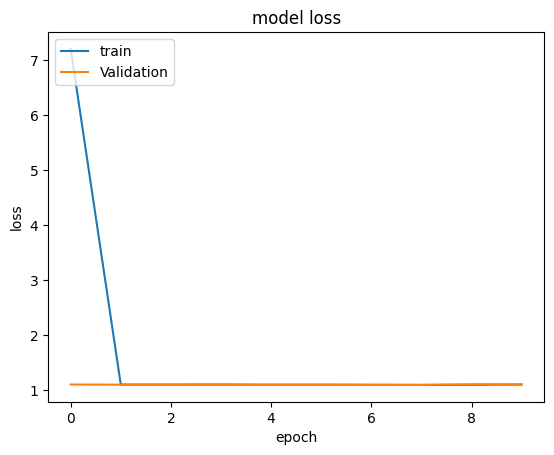

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

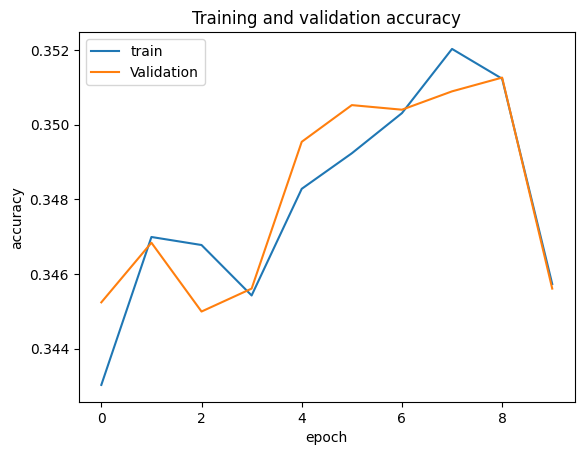

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [50]:

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

319/319 [==============================] - 1s 1ms/step


In [55]:
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))

f1_score =  0.17821886154679056
0.3454134747593793
              precision    recall  f1-score   support

           0       0.88      0.00      0.00      3360
           1       0.00      0.00      0.00      3312
           2       0.34      1.00      0.51      3510

    accuracy                           0.35     10182
   macro avg       0.41      0.33      0.17     10182
weighted avg       0.41      0.35      0.18     10182



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: xlabel='label', ylabel='count'>

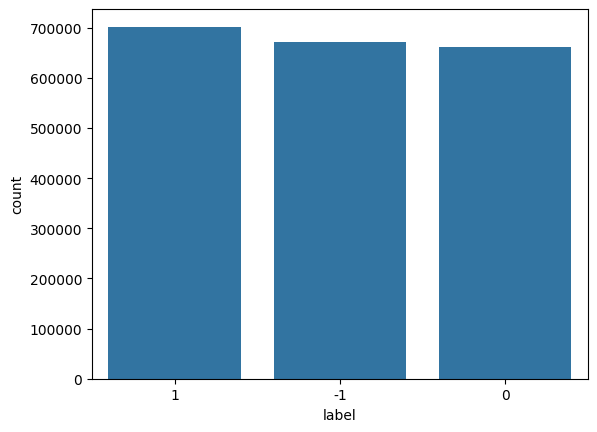

In [58]:
sns.countplot(x = "label", data = df, order = df.label.value_counts().index)

In [59]:
# Model 2
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 198, 64)           11968     
                                                                 
 conv1d_2 (Conv1D)           (None, 196, 64)           12352     
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1605760   
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                                 
Total params: 1630467 (6.22 MB)
Trainable params: 1630467 (6.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# validation_split = 0.1
batch_size = 128

train_epochs = 10
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/10
255/255 [==============================] - 3s 9ms/step - loss: 4.4096 - accuracy: 0.3358 - val_loss: 1.0961 - val_accuracy: 0.3487
Epoch 2/10
255/255 [==============================] - 1s 6ms/step - loss: 1.0949 - accuracy: 0.3502 - val_loss: 1.0962 - val_accuracy: 0.3513
Epoch 3/10
255/255 [==============================] - 2s 6ms/step - loss: 1.0906 - accuracy: 0.3552 - val_loss: 1.0878 - val_accuracy: 0.3579
Epoch 4/10
255/255 [==============================] - 1s 6ms/step - loss: 1.0825 - accuracy: 0.3695 - val_loss: 1.0807 - val_accuracy: 0.3680
Epoch 5/10
255/255 [==============================] - 1s 5ms/step - loss: 1.0680 - accuracy: 0.3942 - val_loss: 1.0627 - val_accuracy: 0.4095
Epoch 6/10
255/255 [==============================] - 1s 5ms/step - loss: 1.0402 - accuracy: 0.4288 - val_loss: 1.0367 - val_accuracy: 0.4424
Epoch 7/10
255/255 [==============================] - 1s 5ms/step - loss: 1.0075 - accuracy: 0.4678 - val_loss: 1.0115 - val_accuracy: 0.4637
Epoch 

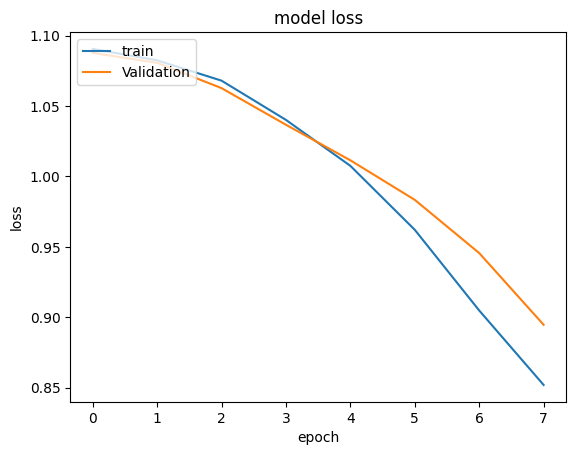

In [64]:

plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

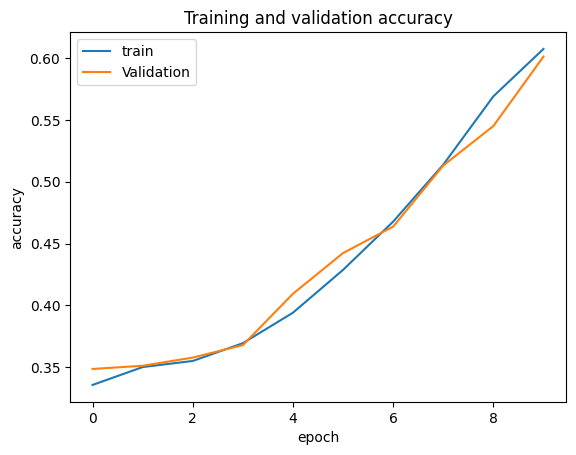

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [65]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))

319/319 [==============================] - 1s 1ms/step
f1_score =  0.5884933431347117
0.5993910823021017
              precision    recall  f1-score   support

           0       0.71      0.41      0.52      3360
           1       0.60      0.55      0.58      3312
           2       0.56      0.82      0.66      3510

    accuracy                           0.60     10182
   macro avg       0.62      0.60      0.59     10182
weighted avg       0.62      0.60      0.59     10182



In [71]:
# Model 2
model = Sequential()
model.add(LSTM(300, input_shape=(n_timesteps, n_features), return_sequences=True))
model.add(LSTM(300))
model.add(Dropout(0.5))
model.add(Dense(200, activation='tanh'))
model.add(Dense(130, activation='tanh'))
model.add(Dense(80, activation='tanh'))

model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 200, 300)          435600    
                                                                 
 lstm_8 (LSTM)               (None, 300)               721200    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_19 (Dense)            (None, 200)               60200     
                                                                 
 dense_20 (Dense)            (None, 130)               26130     
                                                                 
 dense_21 (Dense)            (None, 80)                10480     
                                                                 
 dense_22 (Dense)            (None, 3)                

In [76]:
# validation_split = 0.1
batch_size = 256

train_epochs = 100
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/100
128/128 [==============================] - 5s 36ms/step - loss: 0.3162 - accuracy: 0.8841 - val_loss: 0.3724 - val_accuracy: 0.8674
Epoch 2/100
128/128 [==============================] - 4s 31ms/step - loss: 0.2428 - accuracy: 0.9131 - val_loss: 0.3068 - val_accuracy: 0.8895
Epoch 3/100
128/128 [==============================] - 4s 31ms/step - loss: 0.2145 - accuracy: 0.9245 - val_loss: 0.3131 - val_accuracy: 0.8927
Epoch 4/100
128/128 [==============================] - 4s 31ms/step - loss: 0.1950 - accuracy: 0.9329 - val_loss: 0.2714 - val_accuracy: 0.9095
Epoch 5/100
128/128 [==============================] - 4s 31ms/step - loss: 0.1503 - accuracy: 0.9464 - val_loss: 0.2519 - val_accuracy: 0.9134
Epoch 6/100
128/128 [==============================] - 4s 31ms/step - loss: 0.1675 - accuracy: 0.9405 - val_loss: 0.2473 - val_accuracy: 0.9168
Epoch 7/100
128/128 [==============================] - 4s 31ms/step - loss: 0.1515 - accuracy: 0.9482 - val_loss: 0.2486 - val_accuracy:

128/128 [==============================] - 4s 30ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.1143 - val_accuracy: 0.9700
Epoch 58/100
128/128 [==============================] - 4s 31ms/step - loss: 0.0316 - accuracy: 0.9905 - val_loss: 0.0965 - val_accuracy: 0.9697
Epoch 59/100
128/128 [==============================] - 4s 30ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 0.1550 - val_accuracy: 0.9612
Epoch 60/100
128/128 [==============================] - 4s 30ms/step - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.1250 - val_accuracy: 0.9702
Epoch 61/100
128/128 [==============================] - 4s 30ms/step - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0957 - val_accuracy: 0.9734
Epoch 62/100
128/128 [==============================] - 4s 31ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0954 - val_accuracy: 0.9703
Epoch 63/100
128/128 [==============================] - 4s 30ms/step - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.0917 - val_accuracy: 0.976

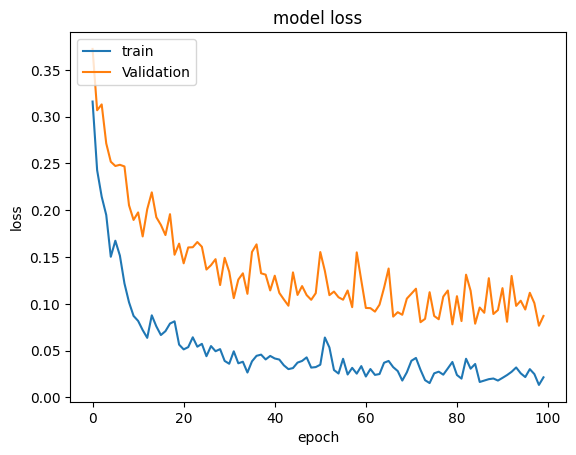

In [77]:

plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

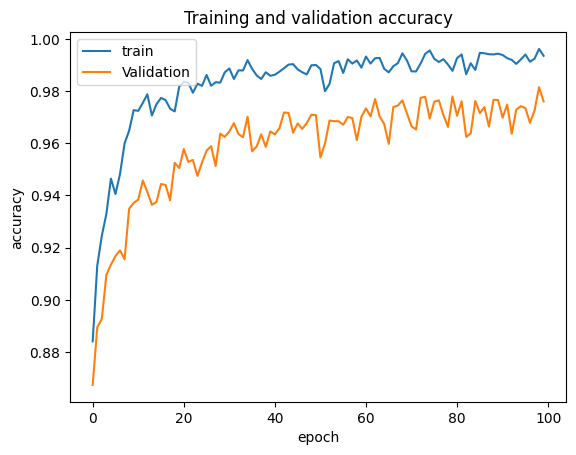

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [79]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))

319/319 [==============================] - 3s 7ms/step
f1_score =  0.9777095497645133
0.9777057552543704
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3360
           1       0.99      0.97      0.98      3312
           2       0.98      0.98      0.98      3510

    accuracy                           0.98     10182
   macro avg       0.98      0.98      0.98     10182
weighted avg       0.98      0.98      0.98     10182



In [82]:
model = Sequential()
model.add(Bidirectional(LSTM(300, return_sequences=True), input_shape=(n_timesteps, n_features)))
model.add(Bidirectional(LSTM(200)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='tanh'))
model.add(Dense(80, activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 200, 600)          871200    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 400)               1281600   
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 400)               0         
                                                                 
 dense_27 (Dense)            (None, 100)               40100     
                                                                 
 dense_28 (Dense)            (None, 80)                8080      
                                                                 
 dense_29 (Dense)            (None, 3)               

In [83]:
# validation_split = 0.1
batch_size = 256

train_epochs = 100
history = model.fit(X_train, y_train_hot, epochs=train_epochs, batch_size=batch_size, verbose=True,  validation_data = (X_val, y_val_hot), shuffle=True)

Epoch 1/100
128/128 [==============================] - 13s 66ms/step - loss: 0.9365 - accuracy: 0.5406 - val_loss: 0.7189 - val_accuracy: 0.6936
Epoch 2/100
128/128 [==============================] - 7s 53ms/step - loss: 0.5524 - accuracy: 0.7741 - val_loss: 0.5085 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 7s 53ms/step - loss: 0.4249 - accuracy: 0.8310 - val_loss: 0.4249 - val_accuracy: 0.8383
Epoch 4/100
128/128 [==============================] - 7s 53ms/step - loss: 0.3365 - accuracy: 0.8703 - val_loss: 0.4347 - val_accuracy: 0.8316
Epoch 5/100
128/128 [==============================] - 7s 54ms/step - loss: 0.3138 - accuracy: 0.8811 - val_loss: 0.3875 - val_accuracy: 0.8467
Epoch 6/100
128/128 [==============================] - 7s 58ms/step - loss: 0.4227 - accuracy: 0.8338 - val_loss: 0.4916 - val_accuracy: 0.8093
Epoch 7/100
128/128 [==============================] - 7s 54ms/step - loss: 0.3514 - accuracy: 0.8679 - val_loss: 0.3922 - val_accuracy

128/128 [==============================] - 7s 53ms/step - loss: 0.0549 - accuracy: 0.9818 - val_loss: 0.1730 - val_accuracy: 0.9391
Epoch 58/100
128/128 [==============================] - 7s 53ms/step - loss: 0.0564 - accuracy: 0.9808 - val_loss: 0.1170 - val_accuracy: 0.9626
Epoch 59/100
128/128 [==============================] - 7s 53ms/step - loss: 0.0486 - accuracy: 0.9836 - val_loss: 0.1246 - val_accuracy: 0.9583
Epoch 60/100
128/128 [==============================] - 7s 53ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.1568 - val_accuracy: 0.9546
Epoch 61/100
128/128 [==============================] - 7s 53ms/step - loss: 0.1089 - accuracy: 0.9625 - val_loss: 0.1761 - val_accuracy: 0.9380
Epoch 62/100
128/128 [==============================] - 7s 53ms/step - loss: 0.1100 - accuracy: 0.9613 - val_loss: 0.1356 - val_accuracy: 0.9553
Epoch 63/100
128/128 [==============================] - 7s 53ms/step - loss: 0.0527 - accuracy: 0.9829 - val_loss: 0.1063 - val_accuracy: 0.969

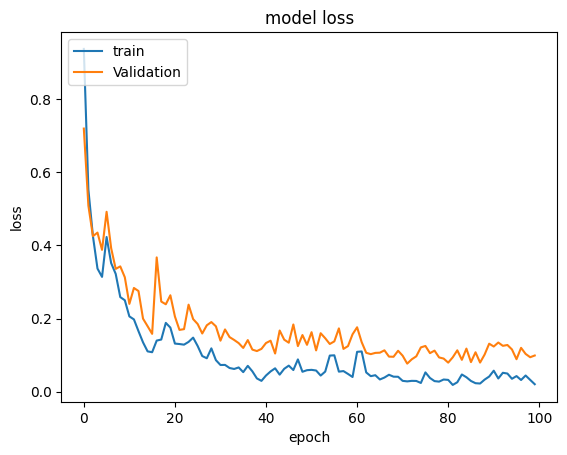

In [84]:

plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

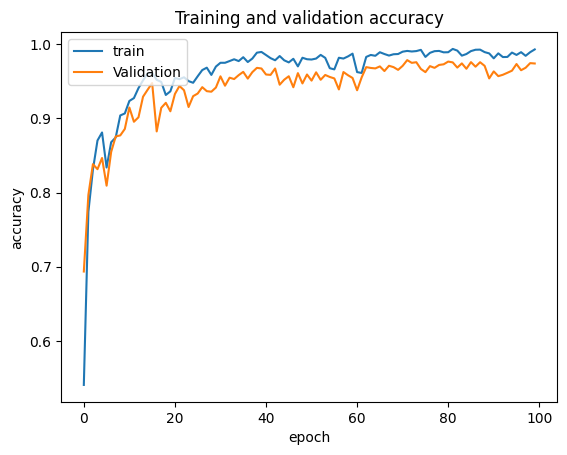

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [86]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))

319/319 [==============================] - 5s 13ms/step
f1_score =  0.9763420484735075
0.9763307798075035
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3360
           1       0.97      0.98      0.97      3312
           2       0.99      0.97      0.98      3510

    accuracy                           0.98     10182
   macro avg       0.98      0.98      0.98     10182
weighted avg       0.98      0.98      0.98     10182

